In [2]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [5]:
import pandas as pd

df2 = pd.read_excel("C:/Users/Dell/Desktop/python/Boston.xlsx")
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
df2.rename(columns = {'MEDV':'House_Price'}, inplace = True)
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,House_Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [7]:
df2.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
LSTAT          0
House_Price    0
dtype: int64

In [8]:
corr = df2.corr()
corr.shape

(13, 13)

In [6]:
# Split Data Vertically into features and Target Separately
X = df2.iloc[:,0:13] #independent columns
y = df2.iloc[:,-1] #target column i.e price range

In [11]:
# Validate Data and Feature Engineering
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

y = np.round(df2['House_Price'])

#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['SPECS','SCORE'] #naming the dataframe columns
featureScores

,SPECS,SCORE
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [42]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score

# Algorithm Libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Feature Selection
print(featureScores.nlargest(8,'SCORE')) #print 5 best features

          SPECS         SCORE
9           TAX  14817.836927
1            ZN   5937.859414
0          CRIM   5503.817133
6           AGE   2424.308937
12  House_Price   1894.066297
8           RAD   1445.257647
11        LSTAT   1430.549632
2         INDUS    873.746270


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

In [23]:
# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()
LogR.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = LogR.predict(X_test)
y_pred

array([35., 24., 24., 50., 24., 23., 35., 28., 16., 15., 30., 21., 16.,
       24., 18., 22., 25., 25., 13., 22., 14., 22., 45., 22., 10., 24.,
       24., 24., 14., 50., 21., 20., 22., 22., 21., 14., 23., 21., 24.,
       24., 18., 22., 20., 22., 28., 24.,  8., 35., 44., 23., 13., 20.,
       23., 33., 45., 35., 13., 14., 35., 20., 23., 10., 24., 35., 21.,
       21., 50., 16., 20., 25., 13., 24., 50., 23., 22., 23., 18., 49.,
       22., 20., 20., 20., 25., 16., 32., 24., 20., 14., 20., 22., 20.,
       28., 20., 20., 19., 13., 36., 14., 13., 24., 20., 10.])

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 10.78%


In [44]:
from sklearn.tree import DecisionTreeRegressor
DT_regr = DecisionTreeRegressor()
DT_regr = LogisticRegression()
DT_regr.fit(X_train, y_train)
DT_ypred = DT_regr.predict(X_test)
DTaccuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(DTaccuracy * 100))

Accuracy: 10.78%


In [47]:
# create a list of models and evaluate each model
models = [
        ('Logistic Regression', LogR),
        ('Decision Tree', DT_regr)
    ]

In [48]:
print("Root Mean Square Error (RMSE) score\n")
scoring = 'neg_mean_squared_error'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  sqrt_cv_results = [math.sqrt(abs(i)) for i in cv_results]
  print("{}: {} ({})".format(name, np.mean(sqrt_cv_results), np.std(sqrt_cv_results)))
  print('Result from each iteration of cross validation:', cv_results, '\n')

Root Mean Square Error (RMSE) score

Logistic Regression: 3.5572932939203215 (0.7347596464849442)
Result from each iteration of cross validation: [ -6.24390244 -11.70731707 -13.29268293 -29.07317073  -9.5
 -15.275      -14.85        -9.175      -12.925       -9.9       ] 

Decision Tree: 3.5572932939203215 (0.7347596464849442)
Result from each iteration of cross validation: [ -6.24390244 -11.70731707 -13.29268293 -29.07317073  -9.5
 -15.275      -14.85        -9.175      -12.925       -9.9       ] 



In [49]:
print("R-squared Value\n")
scoring = 'r2'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10)
  cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  print("{}: {} ({})".format(name, cv_results.mean(), cv_results.std()))
  print('Result from each iteration of cross validation:', cv_results, '\n')

R-squared Value

Logistic Regression: 0.8118974531480665 (0.06809130542002695)
Result from each iteration of cross validation: [0.87855225 0.88316592 0.82215625 0.76121328 0.7490051  0.86623684
 0.68149707 0.85834355 0.74581792 0.87298634] 

Decision Tree: 0.8118974531480665 (0.06809130542002695)
Result from each iteration of cross validation: [0.87855225 0.88316592 0.82215625 0.76121328 0.7490051  0.86623684
 0.68149707 0.85834355 0.74581792 0.87298634] 



In [58]:
# Model Testing
import seaborn as sns
model1 = LogR
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print("Logistic Reggresion")
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)
print("Training Accuracy:",model1.score(X_train,y_train)*100)
print("Testing Accuracy:",model1.score(X_test,y_test)*100)
print("Model Accuracy:",r2_score(y,model1.predict(X))*100)


Logistic Reggresion
RMSE score: 4.636809247747852
R2 score: 0.816784176763143
Training Accuracy: 34.4059405940594
Testing Accuracy: 10.784313725490197
Model Accuracy: -41.507426687348236


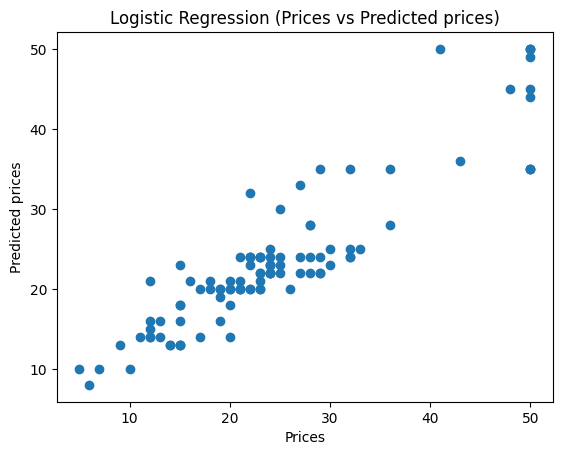

In [64]:
# Visualizing the differences between actual prices and predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Logistic Regression (Prices vs Predicted prices)")
plt.show()

In [59]:
model2 = DT_regr
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))
rsquared_score = r2_score(y_test, y_pred)
print("Decision Tree regressor ")
print('RMSE score:', rmse_score)
print('R2 score:', rsquared_score)
print("Training Accuracy:",model2.score(X_train,y_train)*100)
print("Testing Accuracy:",model2.score(X_test,y_test)*100)
print("Model Accuracy:",r2_score(y,model2.predict(X))*100)

Decision Tree regressor 
RMSE score: 4.636809247747852
R2 score: 0.816784176763143
Training Accuracy: 34.4059405940594
Testing Accuracy: 10.784313725490197
Model Accuracy: -41.507426687348236


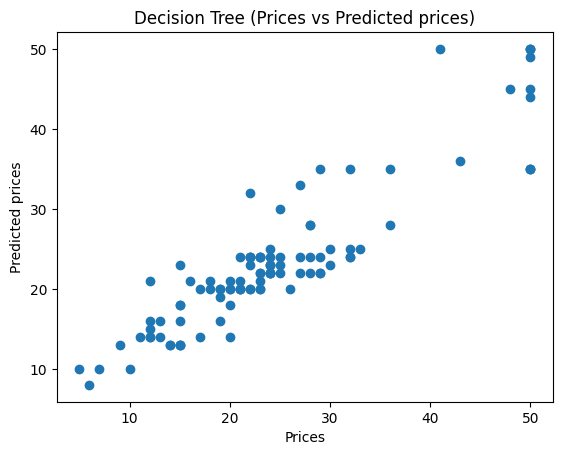

In [65]:
# Visualizing the differences between actual prices and predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, DT_ypred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Decision Tree (Prices vs Predicted prices)")
plt.show()